In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import datetime

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df= pd.read_csv(name, sep=",")

Saving weatherAUS.csv to weatherAUS.csv


In [ ]:
data_copy = df.copy(deep = True)


In [ ]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


In [ ]:
df.shape

(142193, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [ ]:
print(df.isnull().sum())

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64


In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


Trasfromacion de columnas categoricas a numericas las cuales son las siguinetes columnas Date,Location,WindGustDir,WindDir9am,WindDir3am,RainToday y RainTomorrow

In [ ]:
#importa la libreria LabelEncoder para transformar los datos
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df.Location = le.fit_transform(df.Location)
df.WindGustDir = le.fit_transform(df.WindGustDir)
df.WindDir9am = le.fit_transform(df.WindDir9am)
df.WindDir3pm = le.fit_transform(df.WindDir3pm)
df.RainToday = le.fit_transform(df.RainToday)
df.RainTomorrow = le.fit_transform(df.RainTomorrow)
data_copy.RainTomorrow = le.fit_transform(df.RainTomorrow)

In [ ]:
tiempo = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce') 

#Crear las vareables AÑO, MES y DIA
df['YEAR']=tiempo.dt.year
df['MONTH']=tiempo.dt.month
df['DAY']=tiempo.dt.day

#Borrar la data por columna

df=df.drop(['Date'], axis = 1)
df=df[['YEAR','MONTH','DAY','Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow']]
df.head(10)

,YEAR,MONTH,DAY,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008,12,1,2,13.4,22.9,0.6,NaN,NaN,13,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0.0,0
1,2008,12,2,2,7.4,25.1,0.0,NaN,NaN,14,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0.0,0
2,2008,12,3,2,12.9,25.7,0.0,NaN,NaN,15,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0.0,0
3,2008,12,4,2,9.2,28.0,0.0,NaN,NaN,4,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,1.0,0
4,2008,12,5,2,17.5,32.3,1.0,NaN,NaN,13,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0.2,0
5,2008,12,6,2,14.6,29.7,0.2,NaN,NaN,14,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,0,0.0,0
6,2008,12,7,2,14.3,25.0,0.0,NaN,NaN,13,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,0,0.0,0
7,2008,12,8,2,7.7,26.7,0.0,NaN,NaN,13,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,0,0.0,0
8,2008,12,9,2,9.7,31.9,0.0,NaN,NaN,6,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,0,1.4,1
9,2008,12,10,2,13.1,30.1,1.4,NaN,NaN,13,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,1,0.0,0


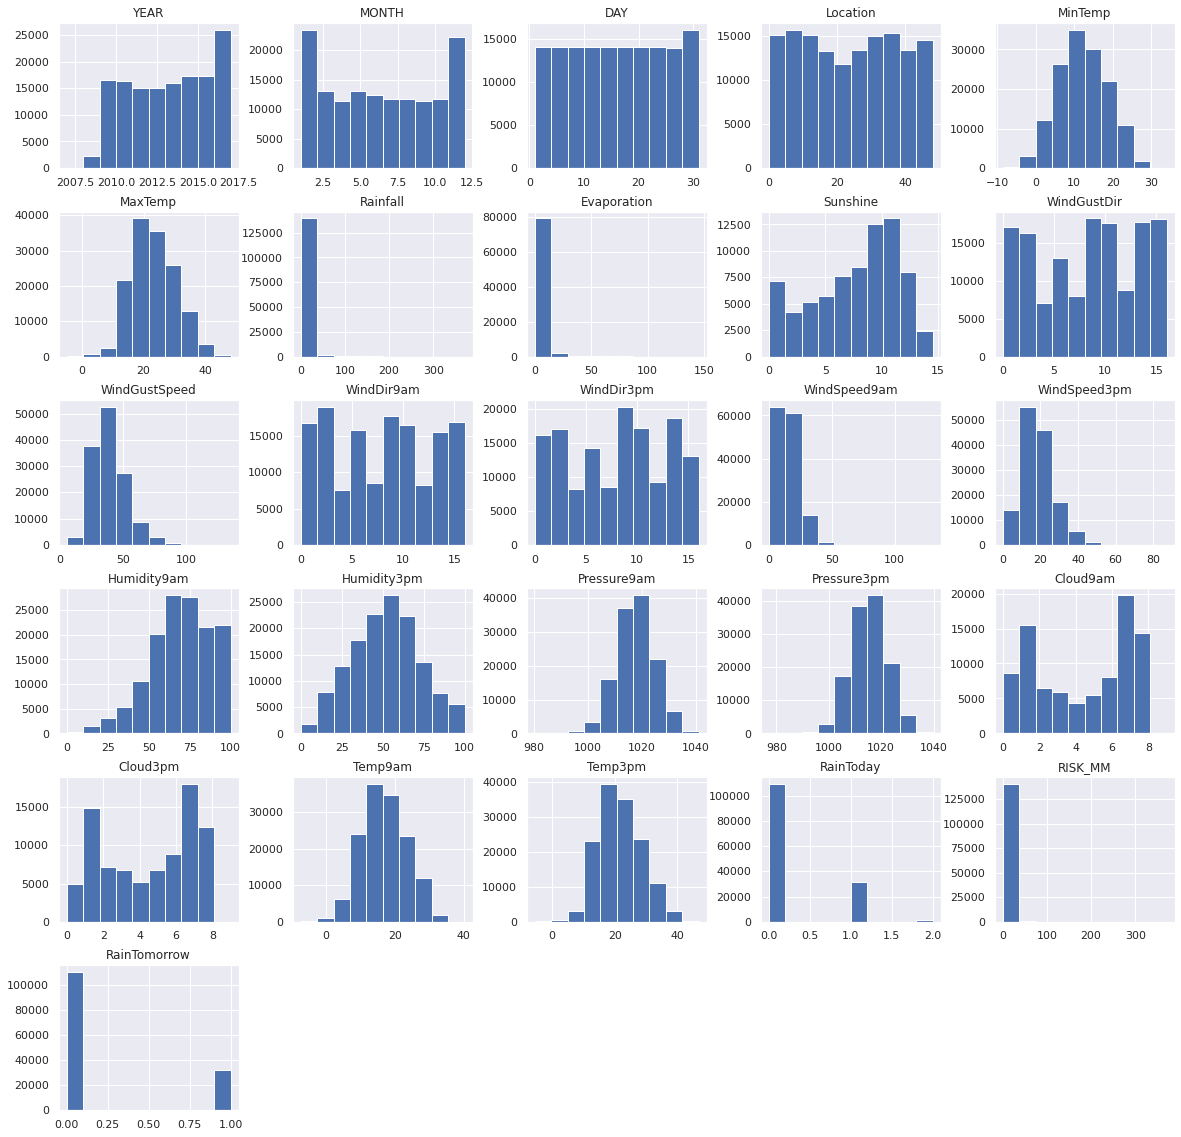

In [ ]:
#Distribución de valores NAN 
p = df.hist(figsize = (20,20))

#transformación de Nan según su distribución de las siguintes columnas:'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','Sunshine', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm'





In [ ]:
colPromedio = [ "MinTemp", "MaxTemp", "Sunshine", "WindGustSpeed", "WindSpeed9am", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Temp9am", "Temp3pm" ]
colMediana = [ "WindSpeed3pm", "Cloud9am", "Cloud3pm" ]

ciudades = df.Location.unique()
anios = df.YEAR.unique()

for y in anios:
  dfTiempo = df[ ( df.YEAR == y ) ]
  for l in ciudades: 
    dn = dfTiempo[ ( dfTiempo.Location == l ) ]
    for c in colPromedio:
      prom = dn[c].mean()
      df[c] = df[c].fillna( prom )
    for c in colMediana:
      mediana = dn[c].median()
      df[c] = df[c].fillna( mediana )

In [ ]:
print(df.isnull().sum())

YEAR                 0
MONTH                0
DAY                  0
Location             0
MinTemp              0
MaxTemp              0
Rainfall          1406
Evaporation      60843
Sunshine             0
WindGustDir          0
WindGustSpeed        0
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday            0
RISK_MM              0
RainTomorrow         0
dtype: int64


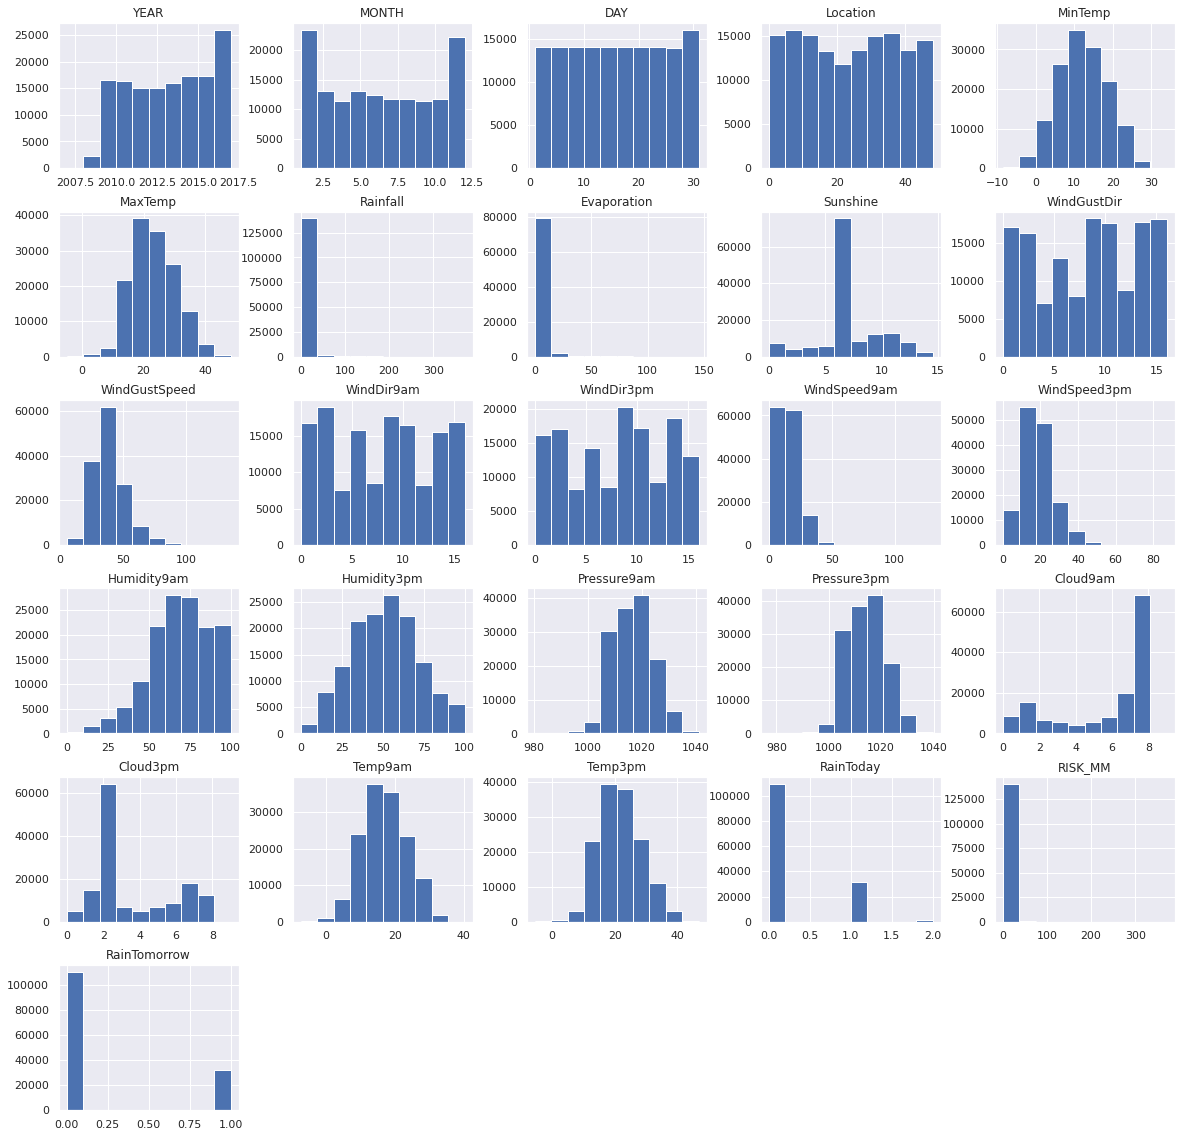

In [ ]:
p = df.hist(figsize = (20,20))

In [ ]:
df.head(5)

,YEAR,MONTH,DAY,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008,12,1,2,13.4,22.9,0.6,NaN,7.074328,13,...,22.0,1007.7,1007.1,8.0,2.0,16.9,21.8,0,0.0,0
1,2008,12,2,2,7.4,25.1,0.0,NaN,7.074328,14,...,25.0,1010.6,1007.8,8.0,2.0,17.2,24.3,0,0.0,0
2,2008,12,3,2,12.9,25.7,0.0,NaN,7.074328,15,...,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0.0,0
3,2008,12,4,2,9.2,28.0,0.0,NaN,7.074328,4,...,16.0,1017.6,1012.8,8.0,2.0,18.1,26.5,0,1.0,0
4,2008,12,5,2,17.5,32.3,1.0,NaN,7.074328,13,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0.2,0


#ANALISIS EXPLORATORIO DE CLASIFICACION

In [ ]:
data_copy.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,0


In [ ]:
#Cantidad de RainTomorrow,Donde la cantidad de dias que no lluvio es de 0= 110.316 y los dias que si lluvio es de 1= 31.877
data_copy.groupby("RainTomorrow").size()

RainTomorrow
0    110316
1     31877
dtype: int64

0    110316
1     31877
Name: RainTomorrow, dtype: int64


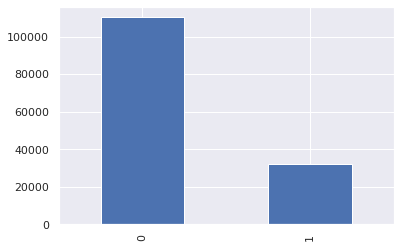

In [ ]:
#Chequeamos en balance de las etiquetas de los datos
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = df["RainTomorrow"].map(lambda x: color_wheel.get(x + 1))
print(df.RainTomorrow.value_counts())
p=data_copy.RainTomorrow.value_counts().plot(kind="bar")

In [ ]:
#Cantidad de dias que lluvio por cada Mes
data_copy[data_copy['RainTomorrow']==1].groupby('Location').size()

Location
Adelaide             688
Albany               902
Albury               618
AliceSprings         244
BadgerysCreek        583
Ballarat             781
Bendigo              562
Brisbane             709
Cairns               950
Canberra             629
Cobar                386
CoffsHarbour         869
Dartmoor             922
Darwin               852
GoldCoast            775
Hobart               761
Katherine            265
Launceston           699
Melbourne            636
MelbourneAirport     653
Mildura              327
Moree                394
MountGambier         920
MountGinini          819
Newcastle            731
Nhil                 242
NorahHead            808
NorfolkIsland        919
Nuriootpa            592
PearceRAAF           505
Penrith              595
Perth                645
PerthAirport         567
Portland            1095
Richmond             560
Sale                 643
SalmonGums           472
Sydney               865
SydneyAirport        774
Townsville      

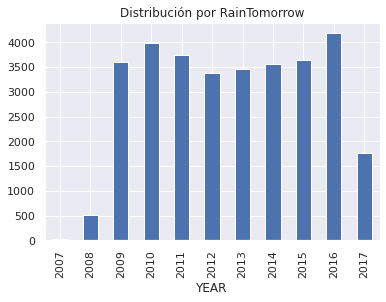

In [ ]:
# Gráfico de cantidad de veces que lluvio por años (Todas las cuidades)
df[df['RainTomorrow']==1].groupby('YEAR').size().plot(kind='bar')
plt.title('Distribución por RainTomorrow')
plt.show()

#ANALISIS EXPLORATORIO DE REGRESION

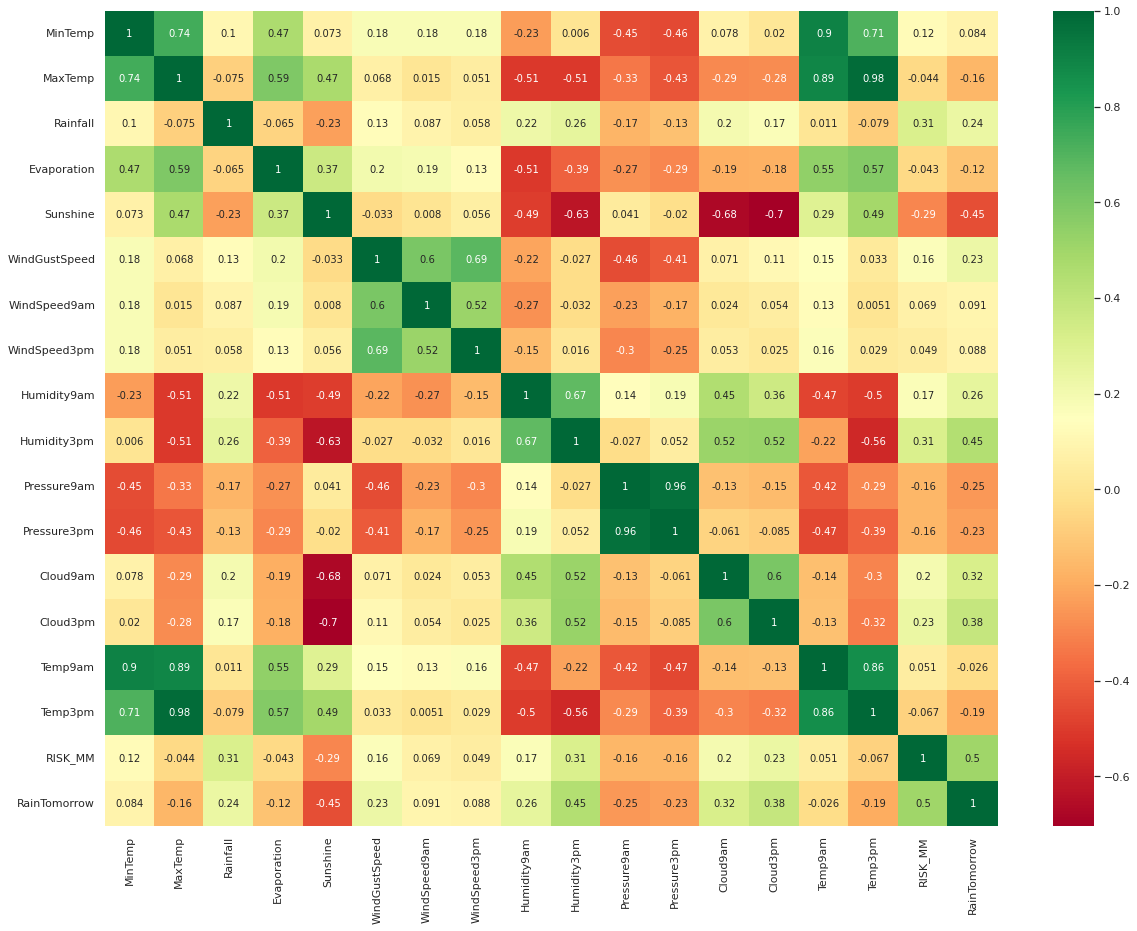

In [ ]:
#Mapa de calor para la correlación de Pearson para los datos originales
plt.figure(figsize=(20,15))  
p=sns.heatmap(data_copy.corr(), annot=True,cmap ='RdYlGn')  

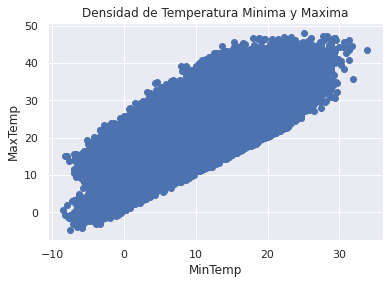

In [ ]:
# Gráfico de densidad por Temperatura Minima y Maxima
x_values = data_copy.MinTemp 
y_values = data_copy.MaxTemp
plt.scatter(x_values, y_values, marker='o');
#plt.plot(x_values, y_values)
plt.title('Densidad de Temperatura Minima y Maxima')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

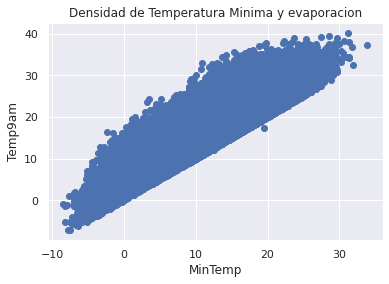

In [ ]:
# Gráfico de dispercion de Temperatura Minima con Temperatura 9am
x_values = data_copy.MinTemp 
y_values = data_copy.Temp9am
plt.scatter(x_values, y_values, marker='o');
#plt.plot(x_values, y_values)
plt.title('Densidad de Temperatura Minima y evaporacion')
plt.xlabel('MinTemp')
plt.ylabel('Temp9am')
plt.show()

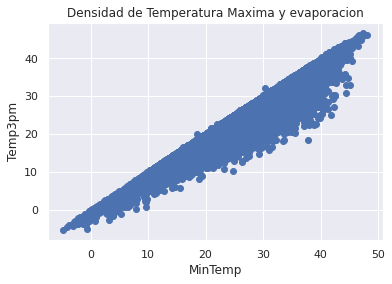

In [ ]:
# Gráfico de dispercion de Temperatura Maxima con Temperatura 
x_values = data_copy.MaxTemp 
y_values = data_copy.Temp3pm
plt.scatter(x_values, y_values, marker='o');
#plt.plot(x_values, y_values)
plt.title('Densidad de Temperatura Maxima y evaporacion')
plt.xlabel('MinTemp')
plt.ylabel('Temp3pm')
plt.show()

Date,Location,WindGustDir,WindDir9am,WindDir3am,RainToday y RainTomorrow

In [ ]:
#Escalamiento con "escalamiento estándar" y generación de datos para "X"
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df.drop(['RainTomorrow','RainToday', 'RISK_MM','Evaporation', 'Sunshine','Rainfall','WindGustDir','WindDir9am',
       'WindDir3pm'],axis = 1),),
        columns=['YEAR', 'MONTH', 'DAY', 'Location', 'MinTemp', 'MaxTemp', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'])

In [ ]:
X.head()

,YEAR,MONTH,DAY,Location,MinTemp,MaxTemp,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,-1.872674,1.633581,-1.672526,-1.527004,0.188884,-0.047270,0.292490,0.678099,0.611825,0.122211,-1.400649,-1.275211,-1.027288,0.776012,-0.614906,-0.015587,0.005525
1,-1.872674,1.633581,-1.558865,-1.527004,-0.750130,0.262054,0.292490,-1.129577,0.382558,-1.299708,-1.255893,-0.870937,-0.929195,0.776012,-0.614906,0.030750,0.368291
2,-1.872674,1.633581,-1.445205,-1.527004,0.110633,0.346416,0.444537,0.565120,0.841092,-1.615690,-1.014633,-1.289152,-0.803076,0.776012,-0.614906,0.617684,0.208674
3,-1.872674,1.633581,-1.331544,-1.527004,-0.468426,0.669800,-1.227983,-0.338719,-1.107678,-1.247045,-1.690162,0.104899,-0.228531,0.776012,-0.614906,0.169760,0.687525
4,-1.872674,1.633581,-1.217883,-1.527004,0.830544,1.274389,0.064419,-0.790638,0.153291,0.701511,-0.869876,-0.843056,-1.181434,0.426200,1.847864,0.123423,1.151866


In [ ]:
#Separamos la "etiqueta o clase" original
y = df.RainTomorrow

#Modelos de Clasificacion

In [ ]:
# Separación en datos de entrenamiento y validación

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)
y

0         0
1         0
2         0
3         0
4         0
         ..
142188    0
142189    0
142190    0
142191    0
142192    0
Name: RainTomorrow, Length: 142193, dtype: int64

#Árbol de Decisión

In [ ]:
#Creación del modelo - Árbol de Decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
modelo = DecisionTreeClassifier(random_state=42)
# Entrenamiento del modelo
modelo.fit(X_train, y_train)
# Validación del modelo
y_pred = modelo.predict(X_test)

Text(0.5, 12.5, 'Predicted label')

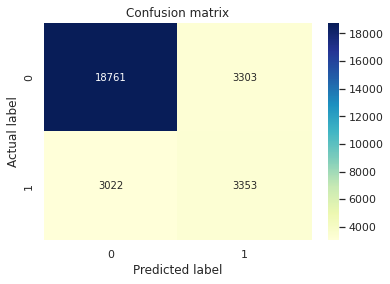

In [ ]:
#Matriz de Confusión
#Datos correctos del modelo es de 22.114 y datos fallados es de 6325
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#Reporte de métricas
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86     22064
           1       0.50      0.53      0.51      6375

    accuracy                           0.78     28439
   macro avg       0.68      0.69      0.69     28439
weighted avg       0.78      0.78      0.78     28439



#Regresion logística

In [ ]:
#Modelo con regresion logística
from sklearn import linear_model
modelo2 = linear_model.LogisticRegression(max_iter=1000)
# Entrenamiento del modelo
modelo2.fit(X_train, y_train)
# Validación del modelo
y_pred_rl = modelo2.predict(X_test)

Text(0.5, 12.5, 'Predicted label')

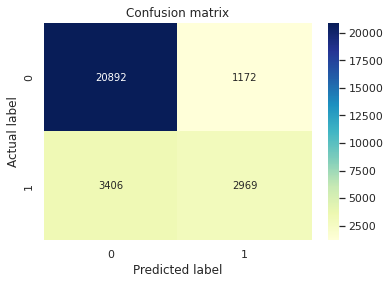

In [ ]:
#Matriz de Confusión
#Datos correctos del modelo es de 23.861 y datos fallados es de 4578
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_rl)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#Reporte de métricas
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_rl))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22064
           1       0.72      0.47      0.56      6375

    accuracy                           0.84     28439
   macro avg       0.79      0.71      0.73     28439
weighted avg       0.83      0.84      0.83     28439



In [ ]:
#YEAR	,MONTH	,DAY,	Location,	MinTemp	,MaxTemp,	WindGustSpeed	,WindSpeed9am	,WindSpeed3pm	,Humidity9am,	Humidity3pm	,Pressure9am,	Pressure3pm	,Cloud9am	,Cloud3pm	,Temp9am,	Temp3pm
modelo2.predict([[2019,	6,	12	,2,	13.4	,22.9	,44.0	,20.0,	24.0,	71.0,	22.0,	1007.7,	1007.1	,8.0,	0,	16.9	,21.8]])

In [ ]:
y_pred_rl

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
for i in y_pred_rl:
  print(i)

Se han truncado las últimas 5000 líneas del flujo de salida.
0
0
1
1
1
0
1
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
1
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
1
1
1
0
0
1
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
1
0
1
0
0
1
0
0
0
0
0
0
0
0
1
0
0
1
0
0
1
0
1
0
0
0
0
1
0
0
0
0
0
1
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
1
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
1
0
0
0

#Modelos de Regresion

In [ ]:
XR =  pd.DataFrame(df.drop(['RainTomorrow','RainToday', 'RISK_MM','Evaporation', 'Sunshine','Rainfall','WindGustDir','WindDir9am',
       'WindDir3pm','MinTemp', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', ],axis = 1),
        columns=['YEAR', 'MONTH', 'DAY','Location','MaxTemp','Temp9am', 'Temp3pm'])

In [ ]:
#Separamos la variable dependiente
yr = df.MinTemp

In [ ]:
#Se importan las librerias necesarias para crear el modelo
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# Se separan las variables predictoras y la predecida
X_train, X_test, y_train, y_test = train_test_split(XR, yr,test_size=0.2,random_state=42)
# Tipo de modelo
modelo = LinearRegression()
# Entrenamiento del modelo
modelo.fit(X_train, y_train)
# Validación del modelo
y_pred = modelo.predict(X_test)
# Evaluación del modelo
print("R2 :%.2f" % r2_score(y_test, y_pred))
print("MSE: %.2f" % mean_squared_error(y_pred, y_test))
print("Score del modelo : %.2f" % modelo.score(X_train, y_train))

R2 :0.83
MSE: 7.07
Score del modelo : 0.83


#DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
# Separar los datos de "train" en entrenamiento y prueba para probar el modelo
X_train, X_test, y_train, y_test = train_test_split(XR , yr, test_size=0.2,random_state = 42)
modelo = DecisionTreeRegressor(max_depth = 4, random_state = 42)
# Entrenamiento del modelo
modelo.fit(X_train, y_train)
# Validación del modelo
Y_pred = modelo.predict(X_test)
# Evaluación del modelo
print('Precisión del modelo (en entrenamiento):', modelo.score(X_train,y_train))
print('Precisión del modelo (en validación):', modelo.score(X_test, y_test))

Precisión del modelo (en entrenamiento): 0.8089828679363378
Precisión del modelo (en validación): 0.8098522471429471


Profundidad del árbol: 4
Número de nodos terminales: 16


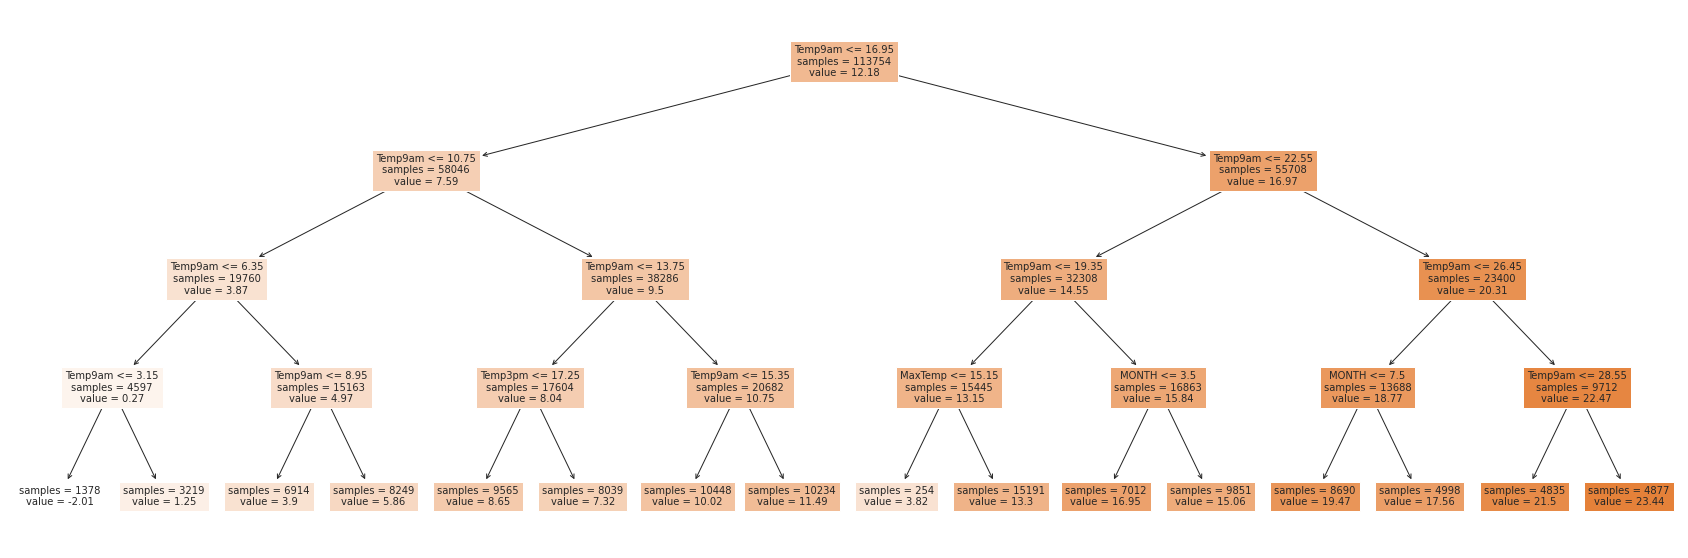

In [ ]:
#Crea el arbol basandose en el modelo y se eliminan todas las columnas menos las columnas seleccionadas.
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(30, 10))
print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")
plot = plot_tree(
decision_tree = modelo,
feature_names = df.drop(columns = ['RainTomorrow','RainToday', 'RISK_MM','Evaporation', 'Sunshine','Rainfall','WindGustDir','WindDir9am',
       'WindDir3pm','MinTemp', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm']).columns,
class_names = 'MinTemp',
filled = True,
impurity = False,
fontsize = 10,
precision = 2,
ax = ax
)